In [20]:
import csv
import matplotlib.pyplot as plt
import math

In [21]:
def cal_data(clock_speeds, population):
  times = [i for i in range(1, 11)]
  maxN = clock_speeds[0]
  minN = clock_speeds[0]
  sum = 0

  for speed in clock_speeds:
    maxN = max(maxN, speed)
    minN = min(minN, speed)
    sum += speed


  mean = sum / len(clock_speeds)

  var = 0
  for speed in clock_speeds:
    var += (speed-mean)**2/population

  std = math.sqrt(var)

  print(f"max: {maxN}")
  print(f"min: {minN}")
  print(f"mean: {mean}")
  print(f"standard deviation: {std}")


  plt.scatter(times, clock_speeds)
  plt.xlabel('time in second')
  plt.ylabel('clock speed')
  plt.show()

# Problem 1

a) Sleep:

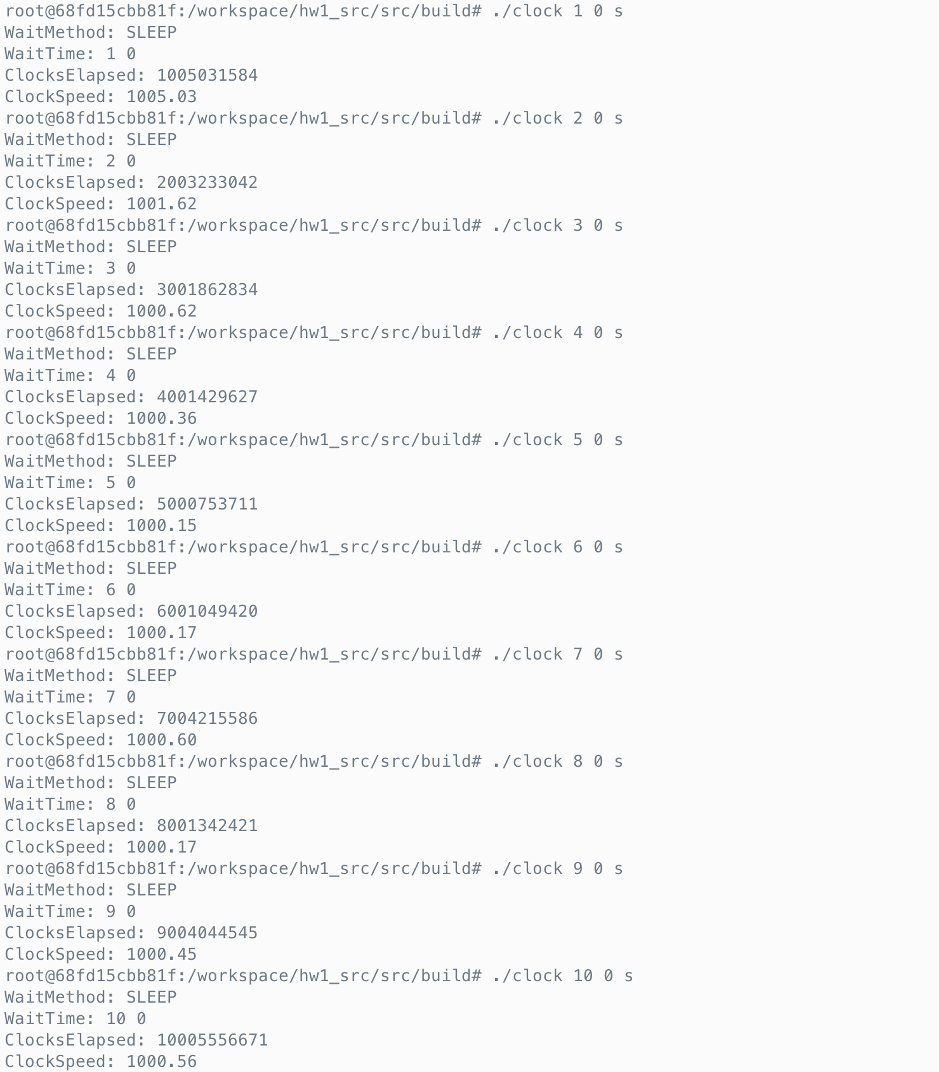

max: 1005.03
min: 1000.15
mean: 1000.973
standard deviation: 1.4116802045789236


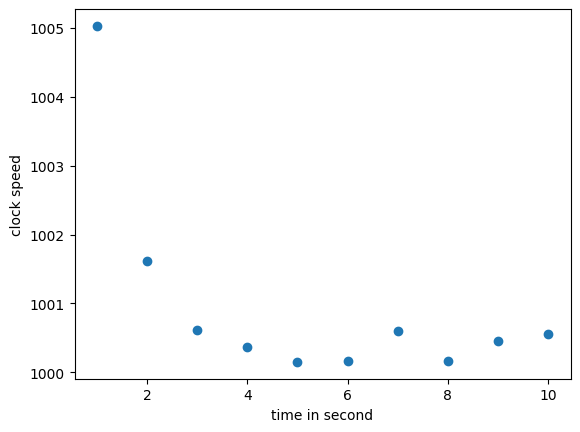

In [22]:
clock_speeds_sleep = [1005.03,1001.62,1000.62,1000.36,1000.15,1000.17,1000.6,1000.17,1000.45,1000.56]
cal_data(clock_speeds_sleep, 10)

b)

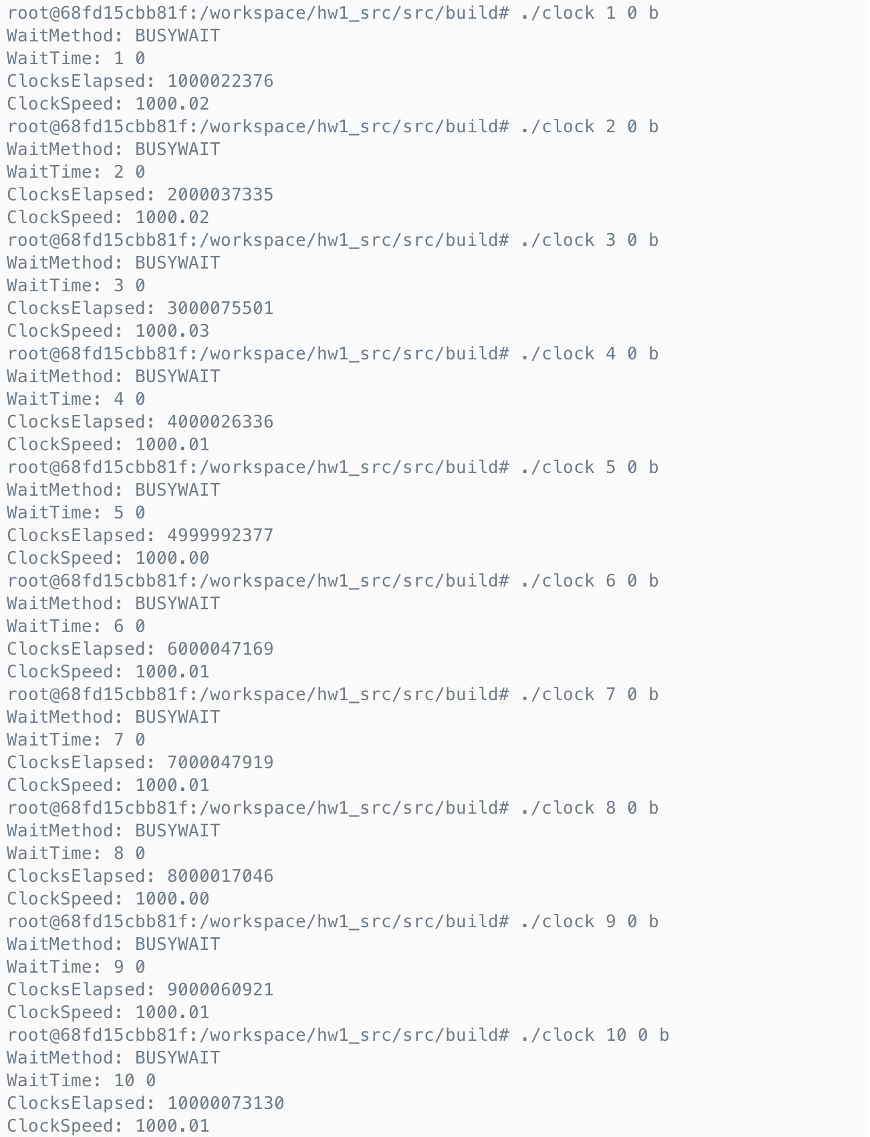

max: 1000.03
min: 1000.0
mean: 1000.0120000000001
standard deviation: 0.00871779788707342


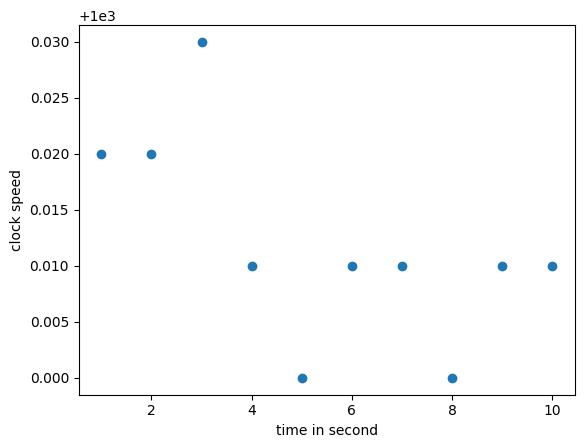

In [23]:
clock_speeds_busy = [1000.02,1000.02,1000.03,1000.01,1000.00,1000.01,1000.01,1000.00,1000.01,1000.01]
cal_data(clock_speeds_busy, 10)

c)

- BUSY is more stable:  BUSY has a smaller standard deviation and the mean than SLEEP.

- BUSY is more precise: the mean of BUSY is closer to 1.

- My Apple M2 Pro has a clock speed of 3490 MHz, which is not close from the clock speed we actually get. The reason is that when there are not many requests for the resources, the apple M chip would automatically save energy by slowing down the CPU clock spped.


# Problem 2


a)
- The receipt timestamp of the first request is 37886.136733
- The completion timestamp of the last request is 37937.438308
- The total time is 37937.438308 - 37886.136733 = 51.301575
- The total number of completed requests in the time period is 500
- The average throughput = 500 / 51.301575 = 9.7463

b)
- The receipt timestamp of the first request is 38846.042287
- The completion timestamp of the last request is 38897.352290
- The total time is 38897.352290 - 38846.042287 = 51.31
- The busy time = 40.66409700000005
- The average throughput = 40.66409700000005 / 51.31 = 0.7925179228696463

c) Percent of CPU this job got: 79%, which matches the result in b)
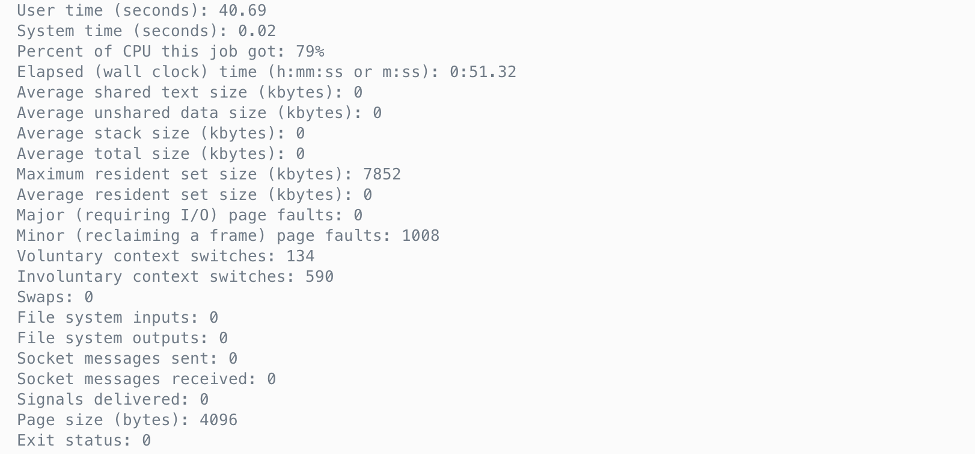

In [37]:
def get_data(path):
    maxN = 0.0
    minN = 100.0
    mean = 0
    sum = 0
    var = 0
    std = 0
    response_ls = []
    with open(path, 'r') as file:
        reader = csv.reader(file)
        for line in reader:
            response_time = (float)(line[-1])-(float)(line[1])
            response_ls.append(response_time)
            maxN = max(maxN, response_time)
            minN = min(minN, response_time)
            sum += response_time
        mean = sum / 500

        for t in response_ls:
            var += (t - mean)**2/500
        std = math.sqrt(var)

    return [maxN, minN, mean, std]

def computer_utilization(path):
    busy_time = 0
    total_time = 0
    with open(path, 'r') as file:
        reader = csv.reader(file)
        rowNum = 0
        for line in reader:
            if rowNum == 0:
                total_time -= (float)(line[3])
            if rowNum == 499:
                total_time += (float)(line[4])
            busy_time += (float)(line[2])
            rowNum+=1

    return busy_time/ total_time

def computer_all_utilization(start_index, end_index):
    all_utilization = []
    for i in range(start_index, end_index+1):
        path = f"./server-output{i}.csv"
        # print(path)
        data = computer_utilization(path)
        all_utilization.append(data)
        # print(data)
    return all_utilization

def get_all_response_avg(i, j):
    mean = 0
    all_means = []
    for i in range(i, j+1):
        path = f"./server-output{i}.csv"
        mean = get_data(path)[2]
        all_means.append(mean)
    return all_means

def plot_graph(x, y, xlabel, ylabel):
    plt.plot(x, y)
    plt.plot(x,y, marker='o')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

In [25]:
from google.colab import files
uploaded = files.upload()


d) As shown in the graph below, there is a positive linear relation between -a param and utilization.

-a param	utilization
1		0.07988882144580202
2		0.15974624402666532
3		0.23958218131455225
4		0.3193628393556868
5		0.3991104933449933
6		0.47895337441717317
7		0.5586485468825482
8		0.6376694254250899
9		0.7156509483127154
10		0.7926220404343243
11		0.86912291335868
12		0.9451385169430209


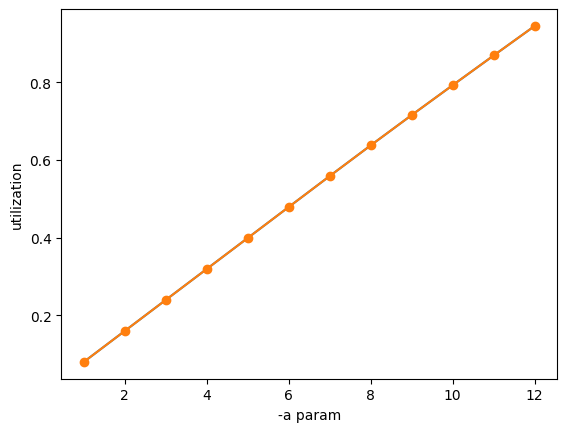

In [38]:
a_nums = [i for i in range(1,13)]
utilizations = computer_all_utilization(1, 12)
print("-a param\tutilization")
for i in range(0, 12):
  print(f'{a_nums[i]}\t\t{utilizations[i]}')
plot_graph(a_nums, utilizations, '-a param', 'utilization')

e)

In [35]:
[maxN, minN, mean, std] = get_data('./server-output10.csv')
print('-'*10+' info of response time when param -a is 10 '+'-'*10)
print(f'Max: {maxN}')
print(f'Min: {minN}')
print(f'Mean: {mean}')
print(f'Standard deviation: {std}')

---------- info of response time when param -a is 10 ----------
Max: 1.4478080000044429
Min: 0.0003349999969941564
Mean: 0.3288919520002964
Standard deviation: 0.3143679245937801


f) There is a positive exponential relation between the utilization and the average wait time.


utilization			average response time
0.07988882144580202		0.0869034940002457
0.15974624402666532		0.0956961160001083
0.23958218131455225		0.10481065799991483
0.3193628393556868		0.11516575600003125
0.3991104933449933		0.1286618399999968
0.47895337441717317		0.14519634399995265
0.5586485468825482		0.1684911260000663
0.6376694254250899		0.19783068600007392
0.7156509483127154		0.25030610800010616
0.7926220404343243		0.3288919520002964
0.86912291335868		0.44265822200017285
0.9451385169430209		0.8278637800000433


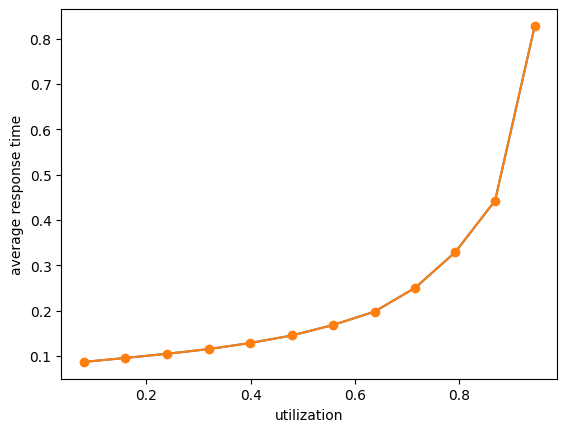

In [39]:
utilizations = computer_all_utilization(1, 12)
response_avgs = get_all_response_avg(1, 12)
print("utilization\t\t\taverage response time")
for i in range(0, 12):
  print(f'{utilizations[i]}\t\t{response_avgs[i]}')
plot_graph(utilizations, response_avgs, 'utilization', 'average response time')